### Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

In [3]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en dr
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic = pd.read_csv("Titanic.csv", sep = ",")

In [5]:
titanic

Survived  Pclass  Sex   Age  SibSp  Parch
0           0       3    0  22.0      1      0
1           1       1    1  38.0      1      0
2           1       3    1  26.0      0      0
3           1       1    1  35.0      1      0
4           0       3    0  35.0      0      0
..        ...     ...  ...   ...    ...    ...
709         0       3    1  39.0      0      5
710         0       2    0  27.0      0      0
711         1       1    1  19.0      0      0
712         1       1    0  26.0      0      0
713         0       3    0  32.0      0      0

[714 rows x 6 columns]

In [6]:
#Separación en Train y Test
X = titanic.drop("Survived", axis=1)
y = titanic.Survived

In [7]:
from sklearn.model_selection import train_test_split 
#Train y Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [8]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier 
arbol_de_decision = DecisionTreeClassifier(max_depth=4, random_state = 42) 

In [9]:
#Fit
arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
#Prediccion
y_test_pred = arbol_de_decision.predict(X_test)

In [11]:
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [12]:
y_test

120    0
329    1
39     1
294    1
654    0
      ..
534    0
393    0
382    1
223    0
140    0
Name: Survived, Length: 215, dtype: int64

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación: 

1. Calcular la métrica Accuracy.

In [13]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7674418604651163

2. Crear la Matriz de Confusión

In [14]:
###Completar
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred) 

array([[102,  24],
       [ 26,  63]])

3. Calcular la métrica Precision

In [15]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred) 

0.7241379310344828

4. Calcular la métrica Recall

In [16]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) 

0.7078651685393258

5. Calcular la métrica F1 score

In [17]:
###Completar
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred) 

0.7159090909090908

6. classification_report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       126
           1       0.72      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



6. Calcular y plotear la Curva ROC

In [19]:
###Completar
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
y_score1

array([0.03797468, 1.        , 0.91666667, 0.98360656, 0.03797468,
       0.1474359 , 0.15789474, 0.91666667, 0.15789474, 0.66666667,
       0.98360656, 0.91666667, 0.54285714, 0.03797468, 0.98360656,
       0.1474359 , 0.1474359 , 0.98360656, 0.1474359 , 0.98360656,
       0.16666667, 0.91666667, 0.66666667, 0.54285714, 0.1474359 ,
       0.1474359 , 0.1474359 , 0.1474359 , 0.66666667, 0.03797468,
       0.66666667, 0.66666667, 0.54285714, 0.03797468, 0.03797468,
       0.15789474, 0.03797468, 0.21621622, 0.21621622, 0.03797468,
       0.1474359 , 0.1474359 , 0.98360656, 0.03797468, 0.21621622,
       0.91666667, 0.91666667, 0.66666667, 0.54285714, 0.98360656,
       0.54285714, 0.91666667, 0.54285714, 0.1474359 , 0.1474359 ,
       0.91666667, 0.54285714, 0.        , 0.1474359 , 0.03797468,
       0.98360656, 0.1474359 , 0.91666667, 0.1474359 , 0.1474359 ,
       0.21621622, 0.1474359 , 0.98360656, 0.1474359 , 0.54285714,
       0.1474359 , 0.98360656, 0.1474359 , 0.1474359 , 0.03797

In [20]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [21]:
  print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.8243267344390939


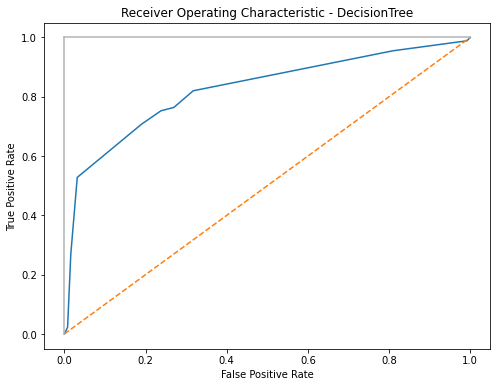

In [22]:
plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f9037d8-f2e9-4683-9ce3-67576f784ec7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>